# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [4]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.sample()

,Age,Tardies
1,51,1


Draw a dispersion diagram (scatter plot) for the data.

<Axes: xlabel='Age', ylabel='Tardies'>

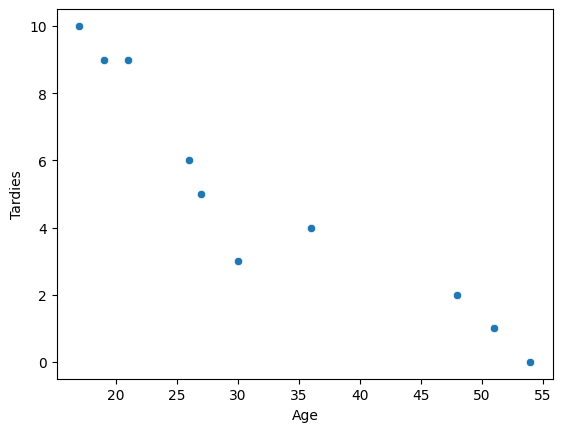

In [7]:
# Your code here.
sns.scatterplot(x = "Age", y = "Tardies", data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [8]:
# Your response here. 
#Yes there's a trend. The tendancy is negative so that means that the older the student the less tardies.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [13]:
# Your response here.
student_data.cov().abs()
#It tells me how much a variable it's going to change depending on how much the other variable changes. 

,Age,Tardies
Age,187.655556,45.566667
Tardies,45.566667,12.544444


In [12]:
student_data.corr().abs()
#It tells me that there's 93% of relationship between tardiness and age. IN the start it's  negative because the tendancy is negative 
# this is  why I  added the abs, because I don't care about if it's positive or negative but only the relationship. 

,Age,Tardies
Age,1.000000,0.939163
Tardies,0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [15]:
# Your response here.
lr = LinearRegression()

In [17]:
X = student_data[["Age"]]
y = student_data.Tardies

lr.fit(X, y) 

LinearRegression()

In [19]:
lr.coef_

array([-0.24282077])

In [21]:
lr.intercept_

12.888803363135771

In [25]:
student_data["prediction_linear_reg"] = student_data.Age * lr.coef_[0] + lr.intercept_

Plot your regression model on your scatter plot.

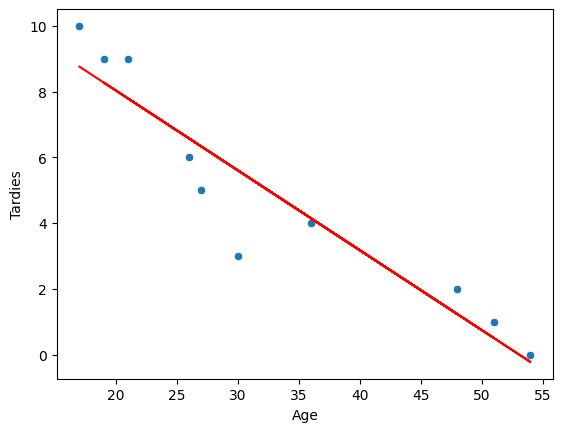

In [27]:
# Your code here.
sns.scatterplot(x = "Age", y = "Tardies", data=student_data)
plt.plot(student_data.Age, student_data["prediction_linear_reg"], c="r")

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [31]:
# Your response here. 
result = smf.ols("Tardies ~ Age", data = student_data).fit()
result.summary()

/Users/emma/miniconda3/envs/ironhack/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        15:12:57   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
''' From that we understand that yes, we can predict tardiness via age. We also see that the model is wuite accurate as its r squared is 
0.8. Also that the residuals are 8 out of 10 points, meaning that only 2 points are on top of the line. So the model it's not over specific (I know it's not this word but I never remember the actual name).'''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [33]:
# Import any libraries you may need & the data
v = pd.read_csv("vehicles.csv")
v.sample(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
29134,Porsche,911 Carrera 4S,2016,3.8,6.0,Manual 7-spd,4-Wheel Drive,Minicompact Cars,Premium,15.695714,19,26,21,415.000000,1950
8883,Dodge,B150/B250 Van 2WD,1991,3.9,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,21.974000,14,17,15,592.466667,2200
3255,Buick,Century,1996,3.1,6.0,Automatic 4-spd,Front-Wheel Drive,Midsize Cars,Regular,15.695714,18,26,21,423.190476,1600


In [43]:
v.columns = v.columns.str.replace(' ', '_')
v.columns = v.columns.str.replace('/', '_')
v.sample()

,Make,Model,Year,Engine_Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_Barrels_Year,City_MPG,Highway_MPG,Combined_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year
12421,Ford,Explorer 2WD FFV,2003,4.0,6.0,Automatic 5-spd,Rear-Wheel Drive,Sport Utility Vehicle - 2WD,Gasoline or E85,20.600625,14,19,16,555.4375,2100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [48]:
v["CO2_Emission_Grams_Mile"]. corr(v["Year"]) 

-0.22229960295054227

In [49]:
v["CO2_Emission_Grams_Mile"]. corr(v["Cylinders"]) 

0.752392553729749

In [50]:
v["CO2_Emission_Grams_Mile"]. corr(v["Fuel_Barrels_Year"]) 

0.9861886621428735

In [51]:
v["CO2_Emission_Grams_Mile"]. corr(v["Combined_MPG"]) 

-0.9262290389336435

In [52]:
v["CO2_Emission_Grams_Mile"]. corr(v["Fuel_Cost_Year"]) 

0.9308651512201843

In [53]:
'''The variable with higher correlation is Fuel Barrels/Year. So that one will be the most important. Although what we can see
is that all the variables we tested are actually correlated so probably they all will be participants of the result of the model. '''

'The variable with higher correlation is Fuel Barrels/Year. So that one will be the most important. Although what we can see\nis that all the variables we tested are actually correlated so probably they all will be participants of the result of the model. '

In [45]:
# Your response here. 

'''X = v[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = v["CO2 Emission Grams/Mile"]

results = smf.ols(f"{y} ~ {X}", data = v).fit()

results.summary()'''

'X = v[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]\ny = v["CO2 Emission Grams/Mile"]\n\nresults = smf.ols(f"{y} ~ {X}", data = v).fit()\n\nresults.summary()'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [56]:
X = v[["Year", "Cylinders", "Fuel_Barrels_Year", "Combined_MPG", "Fuel_Cost_Year"]]
y = v["CO2_Emission_Grams_Mile"]

In [57]:
# Your response here. 
results = smf.ols("CO2_Emission_Grams_Mile ~ Year + Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year", data = v).fit()



In [ ]:
''' The model I used was the Multiple linear regression. The exact model is OLS, Ordinary least squares. What that means is:
we want to predict some values from a linear regression model but with various variables. '''

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [58]:
# Your response here. 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                             15:53:18   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
'''From what we get all the columns tested for the p values compared to the t(s) are 0, so actually all of them are 
apporting in the prediction of CO2.
We can also see that our model is very precise as the r squared is 0.981. But we only have 5 points on the actual line so that leaves
35946 points of residuals. Could that ,mean that it's not over-fitting? We actually cannot say for sure, that's why we can look at the std error.
Although it's always better to see it in a plot. '''

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 